In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
from nltk import bigrams
import plotly.graph_objects as go
!pip install plotly

In [ ]:
data=pd.read_csv("/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Analysis_Data.csv")
data.head()

,retweetcount,text,sentiment,selected_text,hashtags
0,0,✅ ACC ✅\n\nAcc can give Good Breakdown in comi...,positive,good,[]
1,0,So Pakistan just admitted what India has been ...,neutral,so pakistan just admitted what india has been...,[]
2,0,The nationwide lockdown in India which was to ...,negative,lockdown,[]
3,0,COVID 19 cases in India until 250620 2030\n\n...,positive,recovered 277765 6077 deaths 15042 135🙏🏼,[]
4,2,A Watch Worth 385 CroresFacts About 5M Luxury ...,positive,a watch worth 385 croresfacts about 5m luxury...,[]


In [ ]:
data.sentiment.value_counts()

positive    853
neutral     535
negative    200
Name: sentiment, dtype: int64

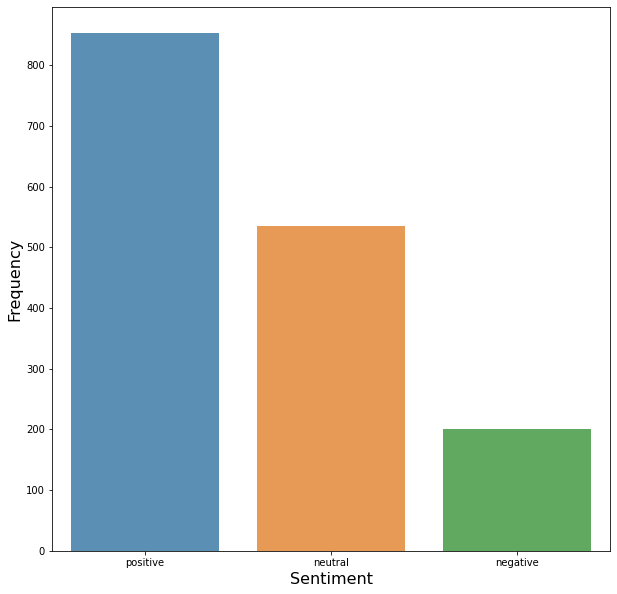

In [ ]:
df = data.sentiment.value_counts()
size=list(df.values)
names=list(df.index)
fig = plt.figure(figsize=(10,10))
plt.xlabel("Sentiment",Fontsize = 16)
plt.ylabel("Frequency",Fontsize=16)
sns.barplot(names,size,alpha = 0.8)
fig.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/bar.png")


In [ ]:
import plotly.express as px
import pandas as pd
df_new = pd.DataFrame(dict(
    r=list(df.values),
    theta=list(df.index)))
plt.figure(figsize=(10,10))
fig = px.line_polar(df_new, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.write_image("/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/radar_plot.png")
fig.show()

<Figure size 720x720 with 0 Axes>

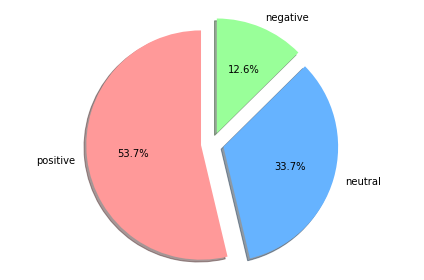

In [ ]:
import matplotlib.pyplot as plt

# Pie chart
labels = list(df.index)
sizes = list(df.values)
# only "explode" the 2nd slice 
explode = (0.1, 0.1, 0.1)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/pie_chart.png')
plt.show()

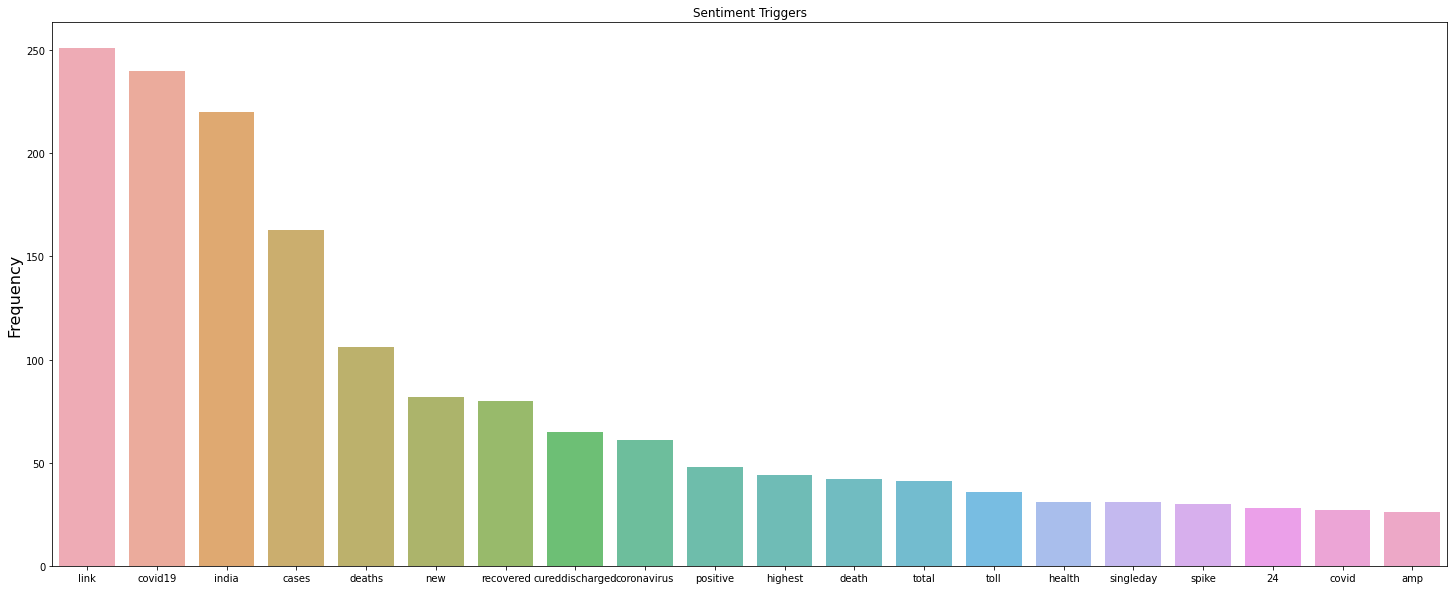

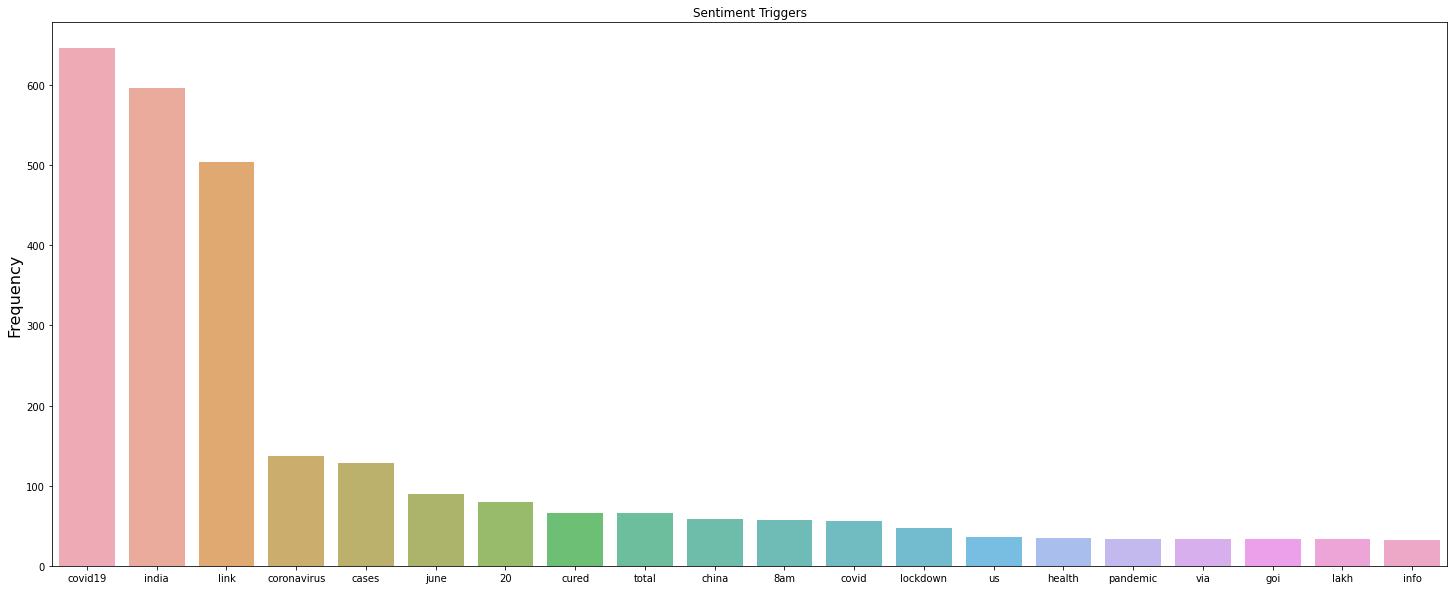

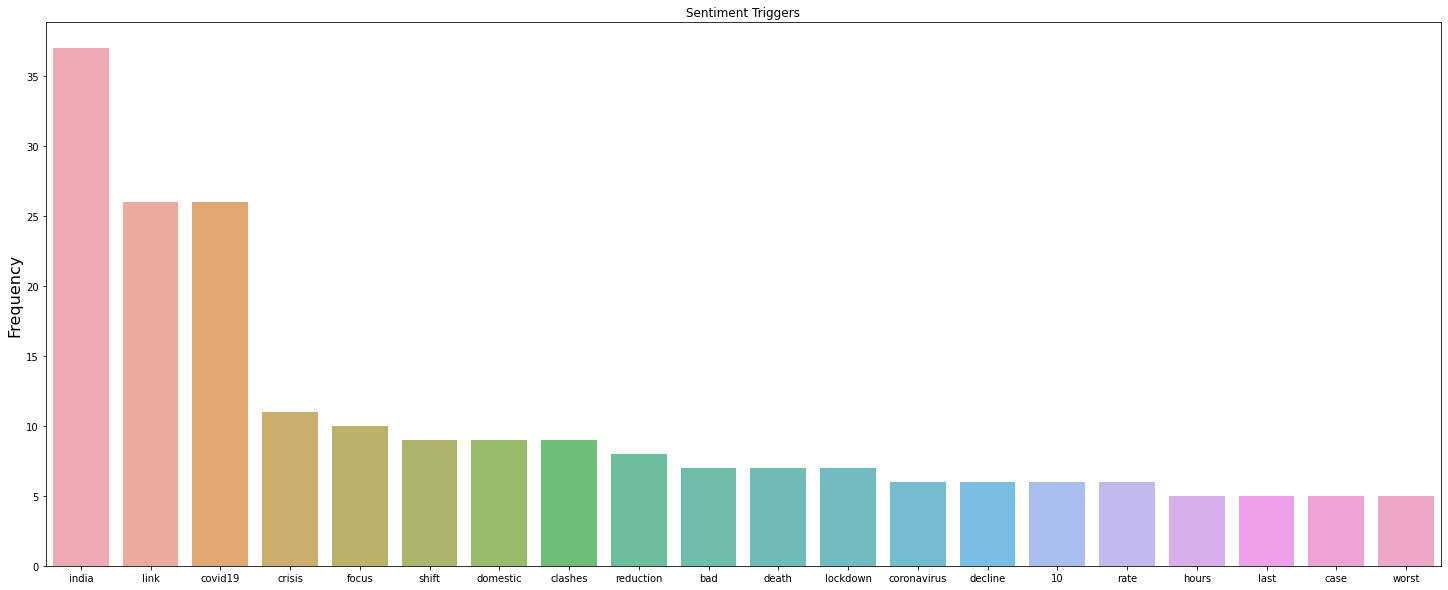

In [ ]:
for i in range(3):
 Data= data[data["sentiment"]==df.index[i]]
 Word_frequency = pd.Series(' '.join(Data.selected_text).split()).value_counts()[:20]  #Calculating the words frequency
 plt.figure(figsize=(25,10))
 plt.ylabel("Frequency",fontsize=16)
 plt.title("Sentiment Triggers")
 sns.barplot(Word_frequency.index,Word_frequency.values,alpha=0.8)
 plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/wordfrequency_"+df.index[i]+".png")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


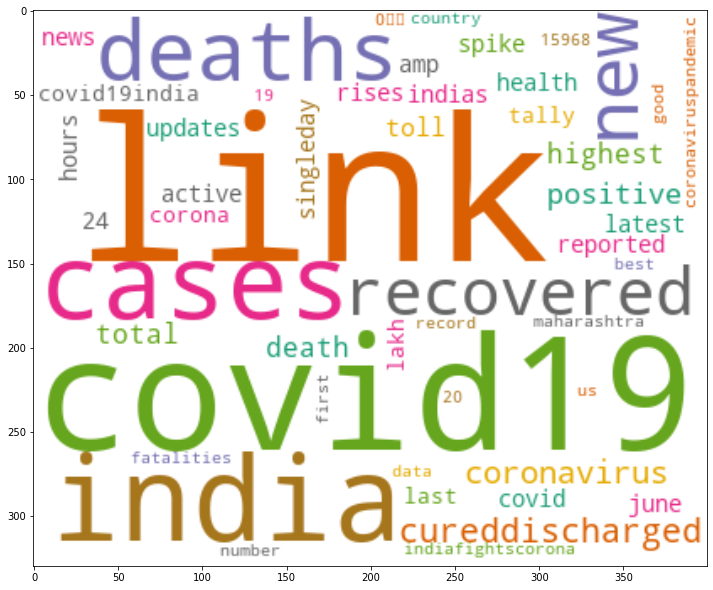

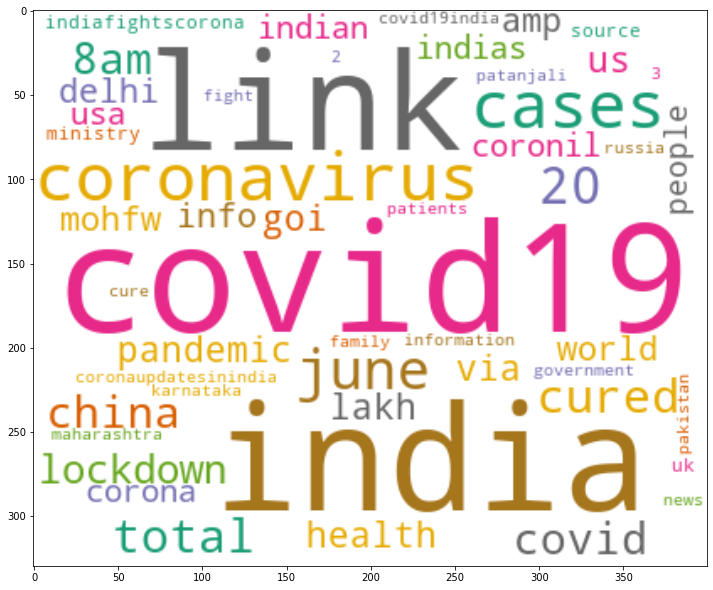

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
import collections
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2",background_color='white', collocations=False).generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.tight_layout(pad=0)
for i in range(0,2):
    Analysis_Data = data
    data["selected_text"]=data["selected_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))
    Sentiment = Analysis_Data[Analysis_Data['sentiment'] == df.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.selected_text).split()).value_counts()[:50]#Calculating the words frequency
    generate_wordcloud(Word_frequency.sort_values(ascending=False),data.index[i])
    plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/Wordcloud_" +df.index[i]+" .png")   
    

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
import collections
data["text"]=data["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))
bigrams = [b for l in data.text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'frequency'])
x =bigram_df.bigram
y = bigram_df.frequency


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


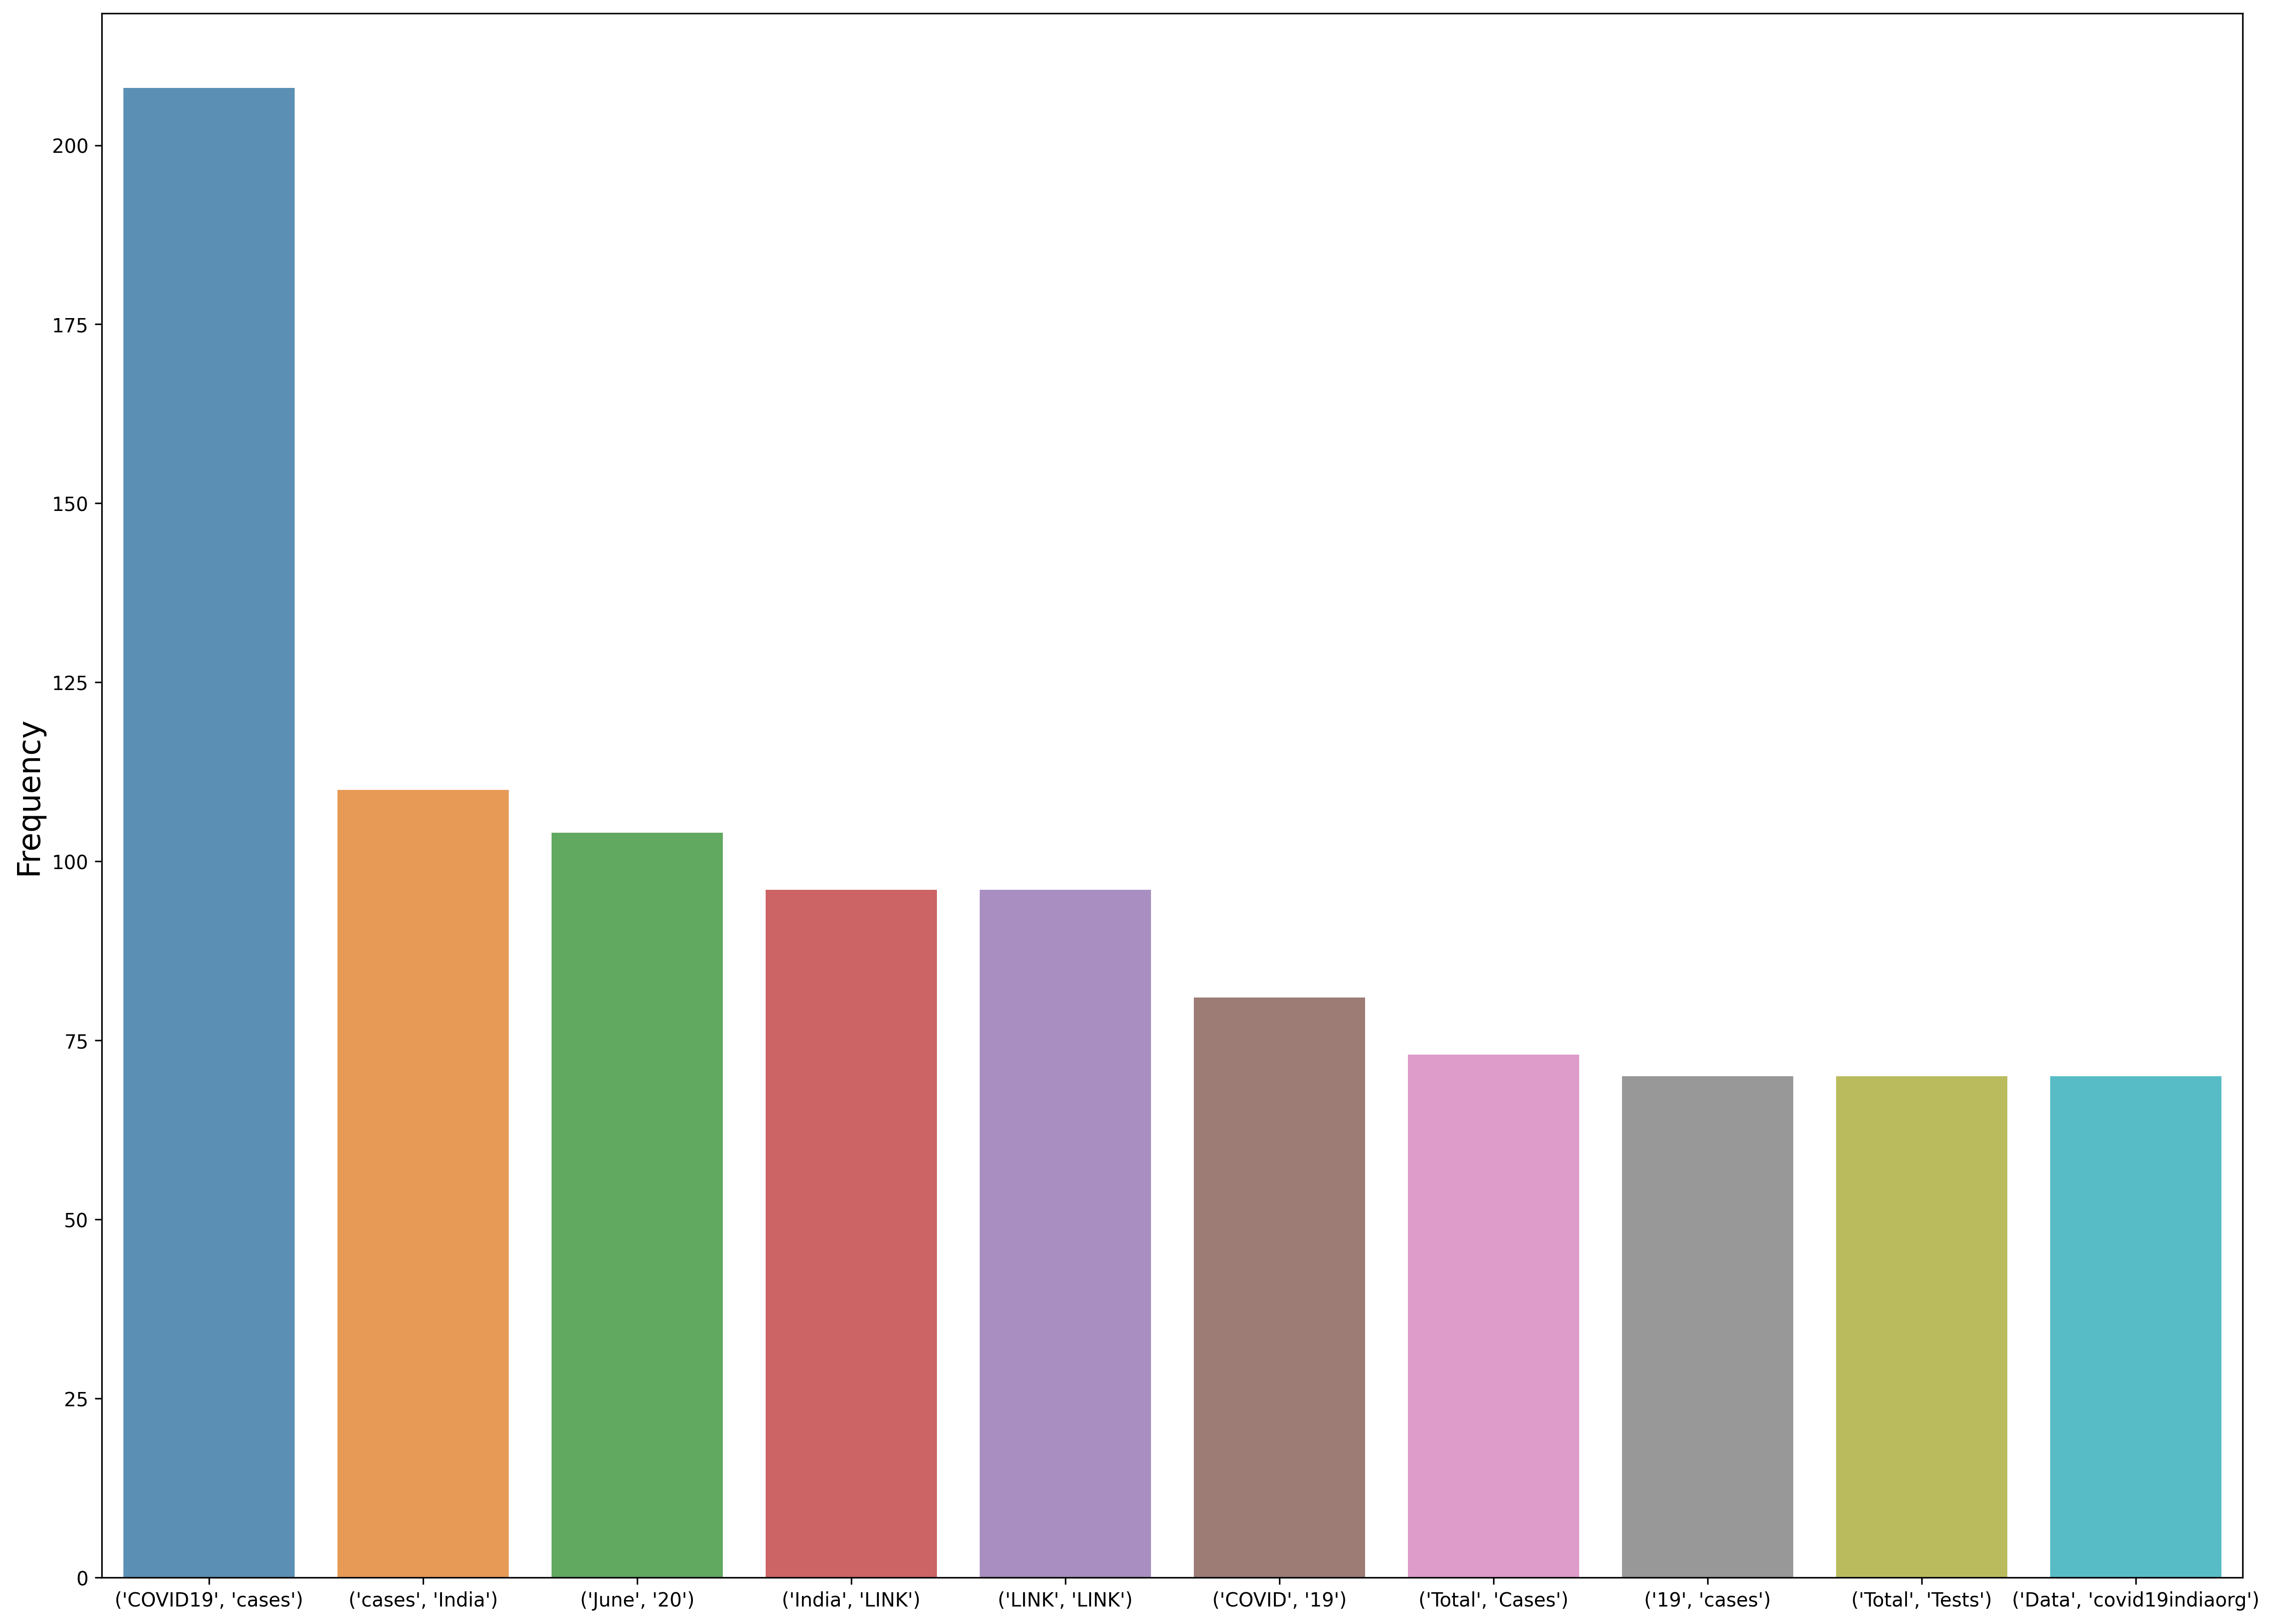

In [ ]:

fig, ax = plt.subplots(1, 1, figsize = (20, 15), dpi=300)
sns.barplot(x,y,alpha=0.8)
plt.ylabel("Frequency",fontsize=16)
ax.set_xlabel('')
plt.savefig('/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/bigram_freq.png')

In [ ]:
import collections
ext_data_negative = data[data["sentiment"]=='negative']
ext_data_positive = data[data["sentiment"]=='positive']
bigrams = [b for l in ext_data_positive.selected_text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df_positive = pd.DataFrame(bigram_counts.most_common(60),
                             columns=['bigram', 'frequency'])
bigrams = [b for l in ext_data_negative.selected_text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df_negative = pd.DataFrame(bigram_counts.most_common(80),
                             columns=['bigram', 'frequency'])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Create network plot 
G=nx.grid_2d_graph(2,2)

pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100)
fig,ax = plt.subplots(figsize=(50,30)) 
d = bigram_df_negative.set_index('bigram').T.to_dict('records')
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100) 
  
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=4,
                 edge_color='#e25a4b',
                 node_size=500,
                 title = "Negative Sentiment",
                 with_labels = False,
                 ax=ax)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,bbox=dict(facecolor='#ffcd94', alpha=0.4),
            horizontalalignment='center', fontsize=35)
plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/ext_negative.png")        
fig,ax  = plt.subplots(figsize=(50,30))
d = bigram_df_positive.set_index('bigram').T.to_dict('records')
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100) 
  
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=4,
                 edge_color='#999894',
                 node_size=500,
                 with_labels = False,
                 title = "Positve Sentiment",
                 ax=ax)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,bbox=dict(facecolor='#7c99d0', alpha=0.4),
            horizontalalignment='center', fontsize=35)
plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/ext_positive.png")    

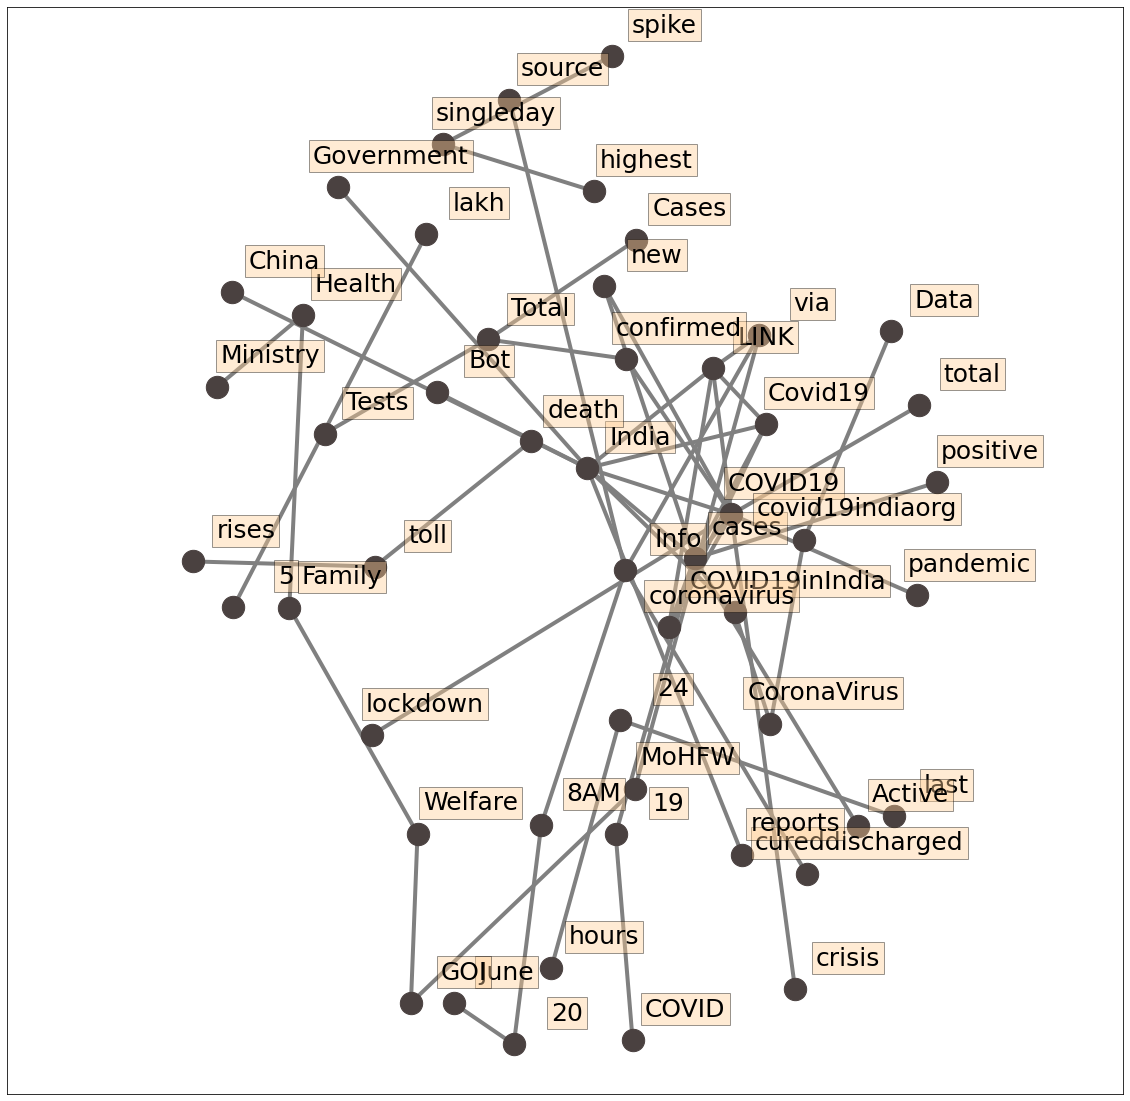

In [ ]:
import collections
data["text"]=data["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))
bigrams = [b for l in data.text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(60),
                             columns=['bigram', 'frequency'])
import networkx as nx
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig,ax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(G,dim=2,k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=4,
                 edge_color='grey',
                 node_color='#4a4140',
                 node_size=500,
                 with_labels = False,
                 ax=ax)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)


# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='#ffcd94', alpha=0.4),
            horizontalalignment='center', fontsize=25)
    
plt.show()   
fig.savefig('/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/network.png') 

In [ ]:
import plotly.express as px
fig = px.box(data, y="retweetcount",points="all")
fig.update_layout(
    yaxis_title="Retweet Count",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()
fig.write_image('/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/retweet_count_boxplot.png')

In [ ]:
import plotly.express as px
fig = px.box(data, y="sentiment",points="all")
fig.update_layout(
    yaxis_title="Sentiment",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()
fig.write_image('/content/drive/My Drive/IBM_Hackathon_2020/Real-time-Data/Images/sentiment_boxplot.png')